Hello! In this notebook we (you) are going to be visualizing and quantifying the relationships between certain variables. Most of these exercises are using a subset of the NHANES dataset from 1999-2000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install sklearn
import sklearn.linear_model as lm
!git clone https://github.com/bwsimedlytics/Week1Public

# Use this to plot trendlines
def trendline(x,m,b):
    xList = list(np.arange(min(x),max(x),(max(x)-min(x))/30))
    plt.plot(xList,[m*delX+b for delX in xList])
    
# EXAMPLE USAGE
# hp = model.fit(x,y)
# trendline(x,hp.coef_[0],hp.intercept_)


  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\Shuen\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


Cloning into 'Week1Public'...
Checking out files:  69% (25/36)   
Checking out files:  72% (26/36)   
Checking out files:  75% (27/36)   
Checking out files:  77% (28/36)   
Checking out files:  80% (29/36)   
Checking out files:  83% (30/36)   
Checking out files:  86% (31/36)   
Checking out files:  88% (32/36)   
Checking out files:  91% (33/36)   
Checking out files:  94% (34/36)   
Checking out files:  97% (35/36)   
Checking out files: 100% (36/36)   
Checking out files: 100% (36/36), done.


In [2]:
data = pd.read_csv("Week1Public/BWSI_Dataset1.csv")

In [3]:
data.head(5)

,SubjectID,Year,Sex,Age,Ethnicity,ParentEducation,MaritalStatus,HouseIncome,Protein,Carb,...,Chol,VitA,VitC,Weight,Height,BMI,BloodPres,Diabetes,HealthIns,HoursTV
0,1,6,1,49,3,5,1,11,97.13,253.98,...,180.57,10292.63,112.19,92.5,178.3,29.10,694,2,1,2
1,2,2,1,37,3,4,5,11,130.02,309.57,...,1242.06,4181.03,70.96,99.2,180.0,30.62,1169,2,1,1
2,3,1,1,70,1,1,1,3,67.01,268.23,...,37.41,36792.50,78.51,63.6,157.7,25.57,725,1,1,5
3,4,6,2,38,3,5,3,8,82.66,264.69,...,596.30,3075.79,36.11,81.6,174.9,26.68,697,2,1,3
4,5,2,2,85,4,1,2,1,39.62,112.24,...,124.95,16894.37,69.19,41.5,144.2,19.96,687,2,1,1


Here's a list of all the column names, or every feature in the dataset.

In [4]:
list(data)

['SubjectID',
 'Year',
 'Sex',
 'Age',
 'Ethnicity',
 'ParentEducation',
 'MaritalStatus',
 'HouseIncome',
 'Protein',
 'Carb',
 'TotalFat',
 'Chol',
 'VitA',
 'VitC',
 'Weight',
 'Height',
 'BMI',
 'BloodPres',
 'Diabetes',
 'HealthIns',
 'HoursTV']

We're only going to be concerned with the real/continuous variables since we're performing linear regression, but we can also split the data into categories and see how the trends change.

Let's look at something relatively simple to start off with. In the cell below, plot a labelled scatterplot of Weight vs. Height and run linear regression on it, using either scikit or writing a function to calculate it manually.

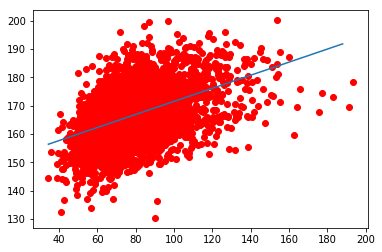

In [17]:
# Insert code here
x = data['Weight']
y = data['Height']
x_mean = x.mean()
y_mean = y.mean()
t1 = 0
t2 = 0
for i in range(len(x)):
    t1 += (x[i]-x_mean)*(y[i]-y_mean)
    t2 += (x[i]-x_mean)**2
m = t1/t2
b = y_mean-m*x_mean
plt.plot(x, y, 'ro')
trendline(x, m, b)

In [21]:
print(m)
print(b)

0.2304841643997846
148.43673712757055


In [27]:
model = lm.LinearRegression()
x = np.array(x)
x_shaped = x.reshape(-1,1)
heightpredictor = model.fit(x_shaped,y)

In [28]:
print(heightpredictor.coef_,heightpredictor.intercept_)

[0.23048416] 148.43673712757058


What's its $R^2$? 

In [23]:
heightpredictor.score(x_shaped,y)

0.20600198720632049

We know that as people grow in height linearly, their body mass can increase in an exponential way since they're growing in 3D space. Now, try the same scatterplot, but using the logarithm of Weight instead. 

(Hint: np.log([1,2,3]) gives [log(1), log(2), log(3)]. Use np.log on the Weight vector)

[20.1042565] 79.36985294222235


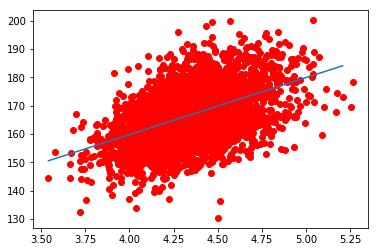

In [30]:
x_log_shaped = np.log(x_shaped)
heightpredictor2 = model.fit(x_log_shaped, y)
print(heightpredictor2.coef_,heightpredictor2.intercept_)
plt.plot(x_log_shaped, y, 'ro')
trendline(x_log_shaped, heightpredictor2.coef_, heightpredictor2.intercept_)

What's the $R^2$ now?

In [34]:
heightpredictor2.score(x_log_shaped, y)

0.22692084707207194

Now we're going to look at another known relationship. BMI is calculated as a function of weight and height, so we should be able to predict it exactly. But what can we use? we know from [this site](https://health.howstuffworks.com/wellness/diet-fitness/weight-loss/bmi1.htm) that the BMI is calculated using $$ \frac{weight}{height^2} $$
All we have to do is fit with those features, weight and 1/height$^2$.

Run linear regression on BMI vs Weight. Find the $R^2$ value

[2.71946718] 1.9626264808808145


0.7525566512746341

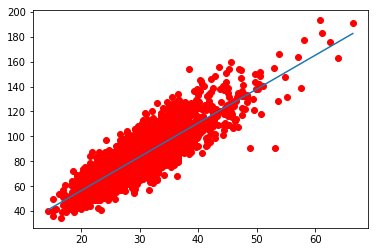

In [38]:
# Insert code here
bmi = data['BMI']
bmi = np.array(bmi)
bmi_shaped = bmi.reshape(-1,1)
weightpredictor = model.fit(bmi_shaped,x)
print(weightpredictor.coef_,weightpredictor.intercept_)
plt.plot(bmi_shaped, x, 'ro')
trendline(bmi_shaped, weightpredictor.coef_, weightpredictor.intercept_)
weightpredictor.score(bmi_shaped, x)

Now add in the vector of 1/height$^2$ to the regression. Remember, 1/data["Height"] will take the reciprocals of each element in data["Height"], and data["Height"]**2 will square each element.

[9.99996545e-05] 1.2262235616657124e-08


0.9999997889438236

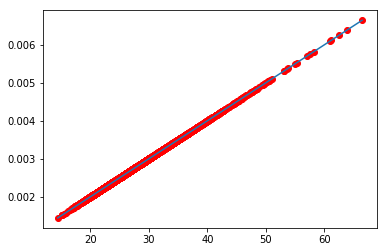

In [39]:
# Insert code here
y_sq = data["Height"]**2
weightpredictor1 = model.fit(bmi_shaped,x/y_sq)
print(weightpredictor1.coef_,weightpredictor1.intercept_)
plt.plot(bmi_shaped, x/y_sq, 'ro')
trendline(bmi_shaped, weightpredictor1.coef_, weightpredictor1.intercept_)
weightpredictor1.score(bmi_shaped, x/y_sq)

What's the $R^2$?

As your last task, find an interesting relationship to visualize within this dataset or another NHANES dataframe. It can be Age vs. Weight, Height vs. TVHours, or anything else you think might show a relationship between two variables. You don't have to run Linear Regression or even find a linear relationship, but a trend should be visible. This exploration will be helpful for thinking and visualizing relationships for the final challenge problem.

In [6]:
# Find something fun!


Finally, if you've made it this far, try to derive the equations underlying Linear Regression. You'll need a bit of calculus, and it's a little trickier than you might think! Remember the total error is expressed in this summation

 $$ \text{Total error = }  \sum^n_{i=1} (y_i - (mx_i+b))^2$$
 
You simply have to take the derivative of this summation with respect to $m$ ($\frac{d}{dm}$) and again with respect to $b$ ($\frac{d}{db}$), set both equations equal to 0, and solve for m and b! You can go back to the Linear Regression notebook if you want to check your answers. 